# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


In [100]:
# %pip install pandas
# %pip install matplotlib

1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

In [101]:
# imports

In [102]:
class Dot:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __lt__(self, b):
        A = (self.x)*(b.y)
        B = (self.y)*(b.x)
        return (A - B) > 0
    
    def __sub__(self, b):
        return Dot(self.x - b.x, self.y - b.y)
    
    def __add__(self, b):
        return Dot(self.x + b.x, self.y + b.y)

    def __repr__(self):
        return f'({self.x}, {self.y})'

In [103]:
def sortDotsByPolarAngle(dotsParam):
    dots = dotsParam.copy()
    anchor = dots[0]
    indx = 0
    anchor_indx = indx
    # find anchor
    for p in dots:
        if p.y < anchor.y :
            anchor = p
            anchor_indx = indx
        elif (p.y == anchor.y and p.x < anchor.x) :
            anchor = p  
            anchor_indx = indx
        indx += 1

    # normalize dots
    norm_dots = []
    dots.pop(anchor_indx)
    for dot in dots:
        norm_dots.append(dot - anchor)
    
    norm_dots.sort()

    sorted_dots = [anchor]
    for dot in norm_dots:
        sorted_dots.append(dot + anchor)

    return sorted_dots

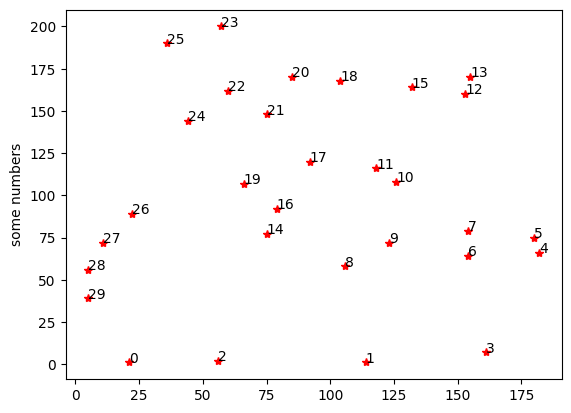

In [104]:
import matplotlib.pyplot as plt
from random import randint 
import random

dot_list = []

random.seed(16)
for i in range(30):
    x = randint(0,200)
    y = randint(0,200)
    a = Dot(x, y)
    dot_list.append(a)

x = []
y = []

for e in sortDotsByPolarAngle(dot_list):
    x.append(e.x)
    y.append(e.y)

fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')
plt.show()


# Envoltória

In [105]:
def isLeftTurn(a, b, c):
    B = b - a
    C = c - a

    term1 = (B.x)*(C.y)
    term2 = (B.y)*(C.x)
    return (term1 - term2) > 0

def Graham(DotListParam):
    DotList = DotListParam
    stack = []
    stack.append(DotList[0])
    stack.append(DotList[1])
    stack.append(DotList[2])

    for i in range(3, len(DotList), 1):
        laster = len(stack) - 1
        while not isLeftTurn(stack[laster - 1], stack[laster], DotList[i]):
            stack.pop()
            laster -= 1
        stack.append(DotList[i])

    return stack


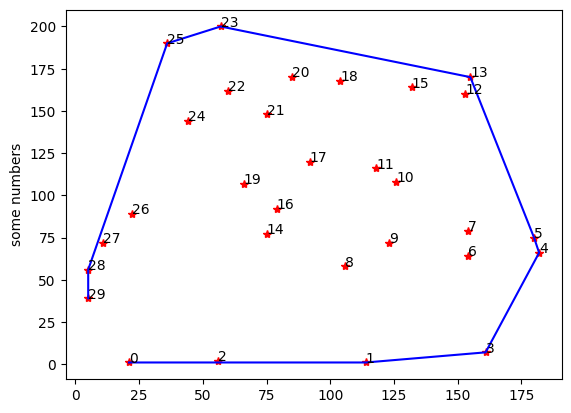

In [106]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')

x_envolt = []
y_envolt = []

sorted_list = sortDotsByPolarAngle(dot_list)

convexEnvelope = Graham(sorted_list)
for e in convexEnvelope:
    x_envolt.append(e.x)
    y_envolt.append(e.y)


ax.plot(x_envolt, y_envolt, 'b-')
plt.show()

# Varredura

In [107]:
%pip install bintrees


Note: you may need to restart the kernel to use updated packages.


In [108]:
class SegmentDot:
    def __init__(self, dot:Dot, segmentIndx,  terminalType):
        # terminal type = 'start' | 'end'
        self.dot = dot
        self.segmentIndx = segmentIndx
        self.terminalType = terminalType
    
    def __repr__(self):
        return f'({self.dot}, {self.segmentIndx}, {self.terminalType})'

    def __lt__(self, b):
        return self.dot.x < b.dot.x


segmentsList = []
for i in range(len(convexEnvelope) - 1):
    left = convexEnvelope[i]
    right = convexEnvelope[i + 1]

    s = SegmentDot(left, i, 'start')
    e = SegmentDot(right, i, 'end')

    segmentsList.append(s)
    segmentsList.append(e)

lastIndx = len(convexEnvelope) - 1
s =  SegmentDot(convexEnvelope[lastIndx], lastIndx, 'start')
e =  SegmentDot(convexEnvelope[0], lastIndx, 'end')
segmentsList.append(s)
segmentsList.append(e)


segmentsList.sort()
segmentsList

[((5, 56), 7, end),
 ((5, 56), 8, start),
 ((5, 39), 8, end),
 ((5, 39), 9, start),
 ((21, 1), 0, start),
 ((21, 1), 9, end),
 ((36, 190), 6, end),
 ((36, 190), 7, start),
 ((57, 200), 5, end),
 ((57, 200), 6, start),
 ((114, 1), 0, end),
 ((114, 1), 1, start),
 ((155, 170), 4, end),
 ((155, 170), 5, start),
 ((161, 7), 1, end),
 ((161, 7), 2, start),
 ((180, 75), 3, end),
 ((180, 75), 4, start),
 ((182, 66), 2, end),
 ((182, 66), 3, start)]

Bintrees:
pip: https://pypi.org/project/bintrees/
doc: https://github.com/mozman/bintrees

In [112]:
import bintrees


lista = [(1, Dot(1, 2)), (2, 'bar'), (4, 'two'), (3, 'three')]
avl = bintrees.AVLTree(lista)

In [109]:
# Verifica se o ponto p3 está na semireta p1p2. 
# p1, p2 e p3 são colineares
def on_segment(p1:Dot, p2:Dot, p3:Dot):
    p1HasLessX = p1.x < p2.x 
    if p1HasLessX and p1.x < p3.x and p2.x > p3.x:
        return True
    if p2.x < p3.x and p1.x > p3.x:
        return True
    return False

In [110]:
def direction(a, b, c):
    # return 1 if turn left
    # return -1 if turn right
    # return 0 if is co-linear
    
    B = b - a
    C = c - a

    term1 = (B.x)*(C.y)
    term2 = (B.y)*(C.x)
    return (term1 - term2) 

In [111]:
def segments_intersect(p1:Dot, p2:Dot, p3:Dot, p4:Dot):
    d1 = direction(p3, p4, p1)
    d2 = direction(p3, p4, p2)
    d3 = direction(p1, p2, p3)
    d4 = direction(p1, p2, p4)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and 0 > d2)) and ((d3 > 0 and d4 < 0) or  (d3 < 0 and d4 > 0)):
        return True
    if d1 == 0 and on_segment(p3, p4, p1):
        return True
    if d2 == 0 and on_segment(p3, p4, p2):
        return True
    if d3 == 0 and on_segment(p1, p2, p3):
        return True
    if d4 == 0 and on_segment(p1, p2, p4):
        return True
        
    return False